In [82]:
from foundations.helpers import scale_input_theory
from brian2 import *
from foundations.helpers import scale_to_freq
from foundations.make_dynamic_experiments import make_dynamic_experiments
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from models.currentmodel import Barrel_PC, Barrel_IN
from foundations.MI_calculations import analyze_exp
from foundations.helpers import make_spiketrain
%matplotlib inline

In [83]:
qon_qoff_type = 'balanced'
baseline = 0  
theta = 0     
factor_ron_roff = 2    
tau_PC = 250
ron_PC = 1./(tau_PC*(1+factor_ron_roff))
roff_PC = factor_ron_roff*ron_PC
mean_firing_rate_PC = (0.1)/1000  
duration = 1000
sampling_rate = 5   
scales = {'CC_PC':19, 'DC_PC':30, 'CC_IN':17, 'DC_IN':6}
dt = 1/sampling_rate 
defaultclock.dt = dt*ms
on_off_ratio = 1.5

In [84]:
#Getting the input, generating the same one for both pyramidal cell and interneuron
#also doing the scaling the same
[input_theory, dynamic_theory, hidden_state] = make_dynamic_experiments(qon_qoff_type, baseline, tau_PC, factor_ron_roff, mean_firing_rate_PC, sampling_rate, duration)
inj_input = scale_input_theory(input_theory, 'current', 0, scales['CC_PC'], dt)

# The feedforward simulation

In [85]:
#The feedforward simulation
start_scope()

PC = Barrel_PC(dt=dt)
PC2 = Barrel_PC(dt=dt)
IN = Barrel_IN(dt=dt)

PC_neuron2 = PC2.getNeurongroup()
PC_neuron = PC.getNeurongroup()
IN_neuron = IN.getNeurongroup()

param = PC.getNamespace().update(IN.getNamespace())                                
syn = Synapses(IN_neuron, PC_neuron, model = 'w : 1', on_pre='''v += w*mV''', namespace = param)
syn.connect()
syn.w = [0.5]

PC_M2 = StateMonitor(PC_neuron2, 'v', record=True)                                
PC_M = StateMonitor(PC_neuron, 'v', record=True)
IN_M = StateMonitor(IN_neuron, 'v', record=True)

PC_S2 = SpikeMonitor(PC_neuron2)                                
PC_S = SpikeMonitor(PC_neuron)
IN_S = SpikeMonitor(IN_neuron)

                                 
run(duration*ms)

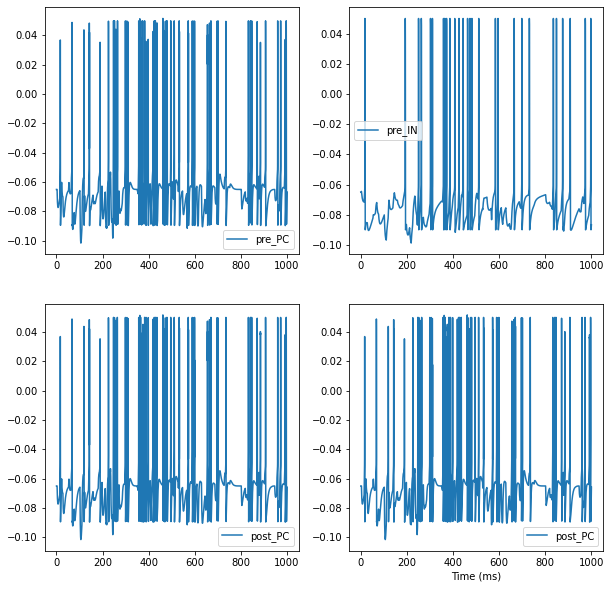

In [81]:
figure(figsize=(10, 10))
subplot(221)
plot(PC_M2.t/ms, PC_M2.v[0], label='pre_PC')
legend()

subplot(222)
plot(IN_M.t/ms, IN_M.v[0], label="pre_IN")
legend()


subplot(223)
plot(PC_M.t/ms, PC_M.v[0], label='post_PC')
legend()

subplot(224)
plot(PC_M.t/ms, PC_M.v[0], label="post_PC")
legend()
xlabel('Time (ms)');

In [88]:
#making the spike trains and doing the MI calculations
IN_spike  = make_spiketrain(IN_s,duration,dt)
PC_spike  = make_spiketrain(PC_s,duration,dt)
PC_spike2 = make_spiketrain(PC_s2, duration, dt)

In [89]:
result_PC  = analyze_exp(ron_PC, roff_PC, hidden_state, input_theory, dt, 0, PC_spike)
#result_IN  = analyze_exp(ron_PC, roff_PC, hidden_state, input_theory, dt, 0, IN_spike)
#result_PC2 = analyze_exp(ron_PC, roff_PC, hidden_state, input_theory, dt, 0, PC_spike2)

No jumps down; reordering not possible


TypeError: bad operand type for abs(): 'NoneType'

# The feedbackward simulation

In [77]:
#The feedforward simulation
start_scope()


PC = Barrel_PC(dt=dt)
PC2 = Barrel_PC(dt=dt)
IN = Barrel_IN(dt=dt)

PC_neuron2 = PC2.getNeurongroup()
PC_neuron = PC.getNeurongroup()
IN_neuron = IN.getNeurongroup()

param = PC.getNamespace().update(IN.getNamespace())                                
syn_forward = Synapses(IN_neuron, PC_neuron, on_pre='''v += 5*mV''', namespace = param)
syn_forward.connect()

syn_backward = Synapses(PC_neuron, IN_neuron, delay = '0.01*ms', on_pre='''v += 5*mV''', namespace = param )
syn_backward.connect()

PC_M2 = StateMonitor(PC_neuron2, 'v', record=True)                                
PC_M = StateMonitor(PC_neuron, 'v', record=True)
IN_M = StateMonitor(IN_neuron, 'v', record=True)

PC_S2 = SpikeMonitor(PC_neuron2)                                
PC_S = SpikeMonitor(PC_neuron)
IN_S = SpikeMonitor(IN_neuron)

                                 
run(duration*ms)

TypeError: __init__() got an unexpected keyword argument 'inpt'